<a href="https://colab.research.google.com/github/karim306/masked_kiva_loans/blob/main/kiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reading Data

In [52]:



import pandas as pd


df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/masked_kiva_loans.csv')
df.head()
df.info()
# **Topic:** The dataset contains information about Kiva loans, a platform that allows people to lend money to entrepreneurs in developing countries.

# **Project Objective:** The goal of this project is to analyze the Kiva loan data to identify factors that contribute to successful loan outcomes. This information can be used by Kiva and other microlending organizations to improve their lending practices and increase the likelihood of borrowers repaying their loans.

# **Specific questions that can be explored:**

# * What are the characteristics of successful borrowers?
# * What sectors are most likely to receive funding?
# * How does the loan amount affect the likelihood of repayment?
# * What is the relationship between the number of lenders and the likelihood of repayment?
# * Can we develop a model to predict the likelihood of a loan being repaid?

# **Potential outcomes:**

# * Identifying factors that contribute to successful loan outcomes can help Kiva and other microlending organizations improve their lending practices and increase the likelihood of borrowers repaying their loans.
# * The results of this analysis can be used to develop a model to predict the likelihood of a loan being repaid. This model can be used by Kiva and other microlending organizations to make more informed lending decisions.
# * The findings of this project can also be used to raise awareness about the importance of microlending and the impact it can have on the lives of entrepreneurs in developing countries.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33561 entries, 0 to 33560
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  33561 non-null  int64  
 1   funded_amount       33561 non-null  int64  
 2   loan_amount         33561 non-null  int64  
 3   sector              33561 non-null  object 
 4   country             33561 non-null  object 
 5   partner_id          32927 non-null  float64
 6   term_in_months      33561 non-null  int64  
 7   lender_count        33561 non-null  int64  
 8   borrower_genders    33366 non-null  object 
 9   repayment_interval  33561 non-null  object 
 10  date                33561 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 2.8+ MB


# Data Cleaning


In [5]:

import pandas as pd
# Drop columns with high number of unique values
df = df.drop(['borrower_genders'], axis=1)

# Fill missing values in 'sector' with 'Unknown'
df['sector'].fillna('Unknown', inplace=True)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Check for duplicate rows
df.duplicated().sum()

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Check for missing values
df.isnull().sum()

# Remove outliers in funded amount
Q1 = df['funded_amount'].quantile(0.25)
Q3 = df['funded_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['funded_amount'] >= lower_bound) & (df['funded_amount'] <= upper_bound)]

# Remove outliers in loan amount
Q1 = df['loan_amount'].quantile(0.25)
Q3 = df['loan_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['loan_amount'] >= lower_bound) & (df['loan_amount'] <= upper_bound)]

# Remove outliers in lender count
Q1 = df['lender_count'].quantile(0.25)
Q3 = df['lender_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['lender_count'] >= lower_bound) & (df['lender_count'] <= upper_bound)]

#Understand the topic of the dataset

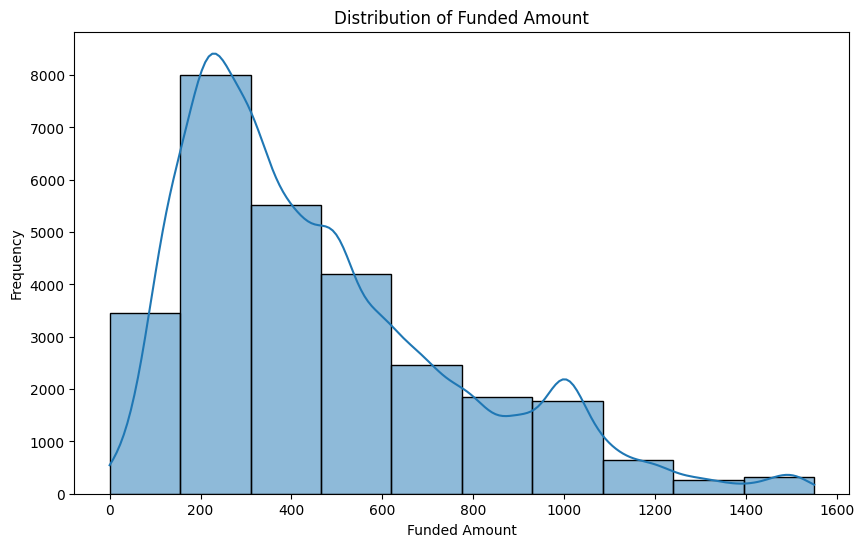

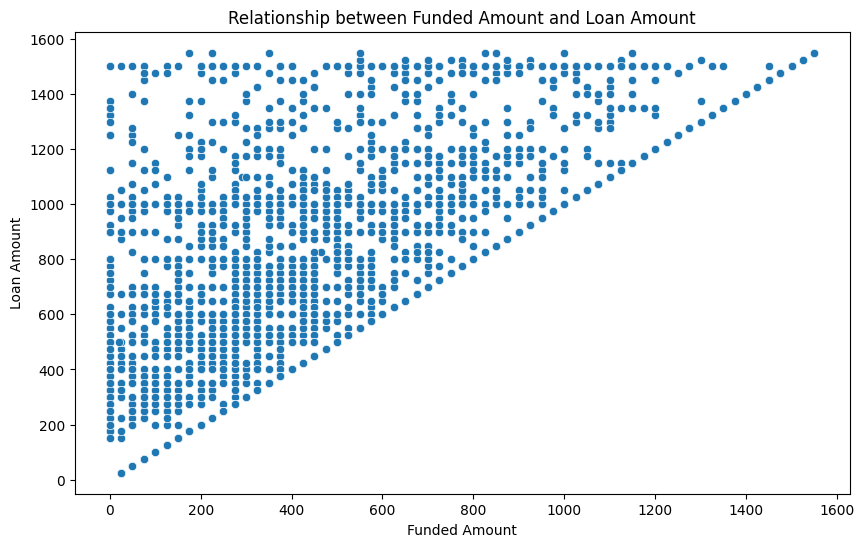

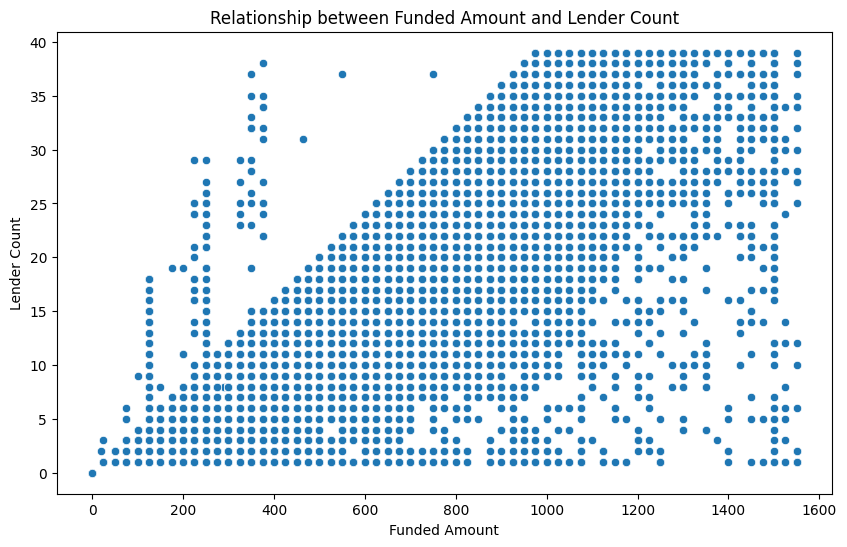

In [6]:
# Calculate summary statistics
df.describe()

# Visualize the distribution of funded amount
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['funded_amount'], kde=True, bins=10)
plt.title('Distribution of Funded Amount')
plt.xlabel('Funded Amount')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationship between funded amount and loan amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='funded_amount', y='loan_amount', data=df)
plt.title('Relationship between Funded Amount and Loan Amount')
plt.xlabel('Funded Amount')
plt.ylabel('Loan Amount')
plt.show()

# Visualize the relationship between funded amount and lender count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='funded_amount', y='lender_count', data=df)
plt.title('Relationship between Funded Amount and Lender Count')
plt.xlabel('Funded Amount')
plt.ylabel('Lender Count')
plt.show()



In [7]:
df.head()


,id,funded_amount,loan_amount,sector,country,partner_id,term_in_months,lender_count,repayment_interval,date
0,1242201,500,500,Agriculture,Pakistan,245.0,14,14,monthly,2017-02-20
1,1165778,325,325,Agriculture,Philippines,145.0,14,13,irregular,2016-10-11
2,1123052,800,800,Agriculture,Ecuador,159.0,14,29,bullet,2016-07-25
3,1312344,425,425,Agriculture,Philippines,136.0,8,1,irregular,2017-06-02
4,861422,275,275,Agriculture,Kenya,133.0,12,11,monthly,2015-03-25


#  Evaluate a machine learning mode

In [10]:

import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeClassifier

# Define a function to evaluate and print metrics for regression models
def evaluate_regression_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2) score:", r2)
    return mse, r2

# Define a function to evaluate and print metrics for classification models
def evaluate_classification_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    confusion_mat = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)

# Split the data into training and testing sets
X = df[['loan_amount', 'lender_count']]
y = df['funded_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate multiple regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

for name, model in models.items():
    print("\n", name)
    model.fit(X_train, y_train)
    mse, r2 = evaluate_regression_model(model, X_test, y_test)

# Train and evaluate a classification model (Ridge Classifier)
X_class = df[['loan_amount', 'lender_count', 'term_in_months']]
y_class = np.where(df['funded_amount'] > df['funded_amount'].median(), 1, 0)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

classifier = RidgeClassifier()
classifier.fit(X_train_class, y_train_class)
evaluate_classification_model(classifier, X_test_class, y_test_class)





 Linear Regression
Mean Squared Error (MSE): 12117.140765032018
R-squared (R2) score: 0.8726440387262158

 Decision Tree Regressor
Mean Squared Error (MSE): 12446.29630643122
R-squared (R2) score: 0.8691844832752745

 Random Forest Regressor
Mean Squared Error (MSE): 10587.252094387066
R-squared (R2) score: 0.8887237761882196
Confusion Matrix:
 [[3014   90]
 [ 591 2000]]
Accuracy: 0.8804214223002634


#Time Sereis

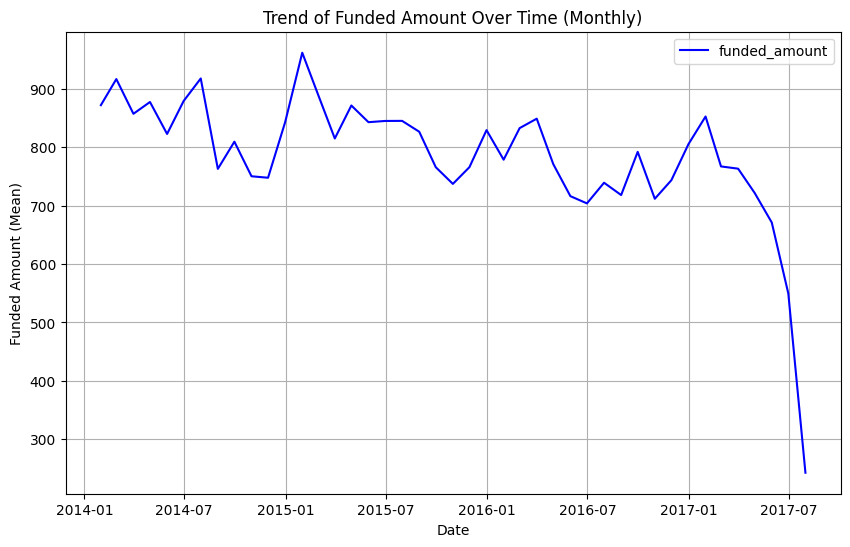

In [63]:

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Visualize the time series

# Create a new DataFrame with only 'funded_amount' and 'date' columns
dfs = df[['funded_amount', 'date']].copy()

# Convert the 'date' column to datetime using .loc to modify the original DataFrame
df.loc[:, 'date'] = pd.to_datetime(df['date'])

# Display the first few rows of the new DataFrame
dfs.set_index('date', inplace=True)

dfs.head()


import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Downsampling the data by resampling and aggregating over specific time intervals
interval = '1M'  # Resample data over monthly intervals
df_resampled = dfs.resample(interval).mean()  # Calculate the mean funded amount for each month

# Set figure size
plt.figure(figsize=(10, 6))

# Plot the trend of funded amount over time (resampled and aggregated)
plt.plot(df_resampled.index, df_resampled['funded_amount'], label='funded_amount', color='blue')

# Add labels and title
plt.title('Trend of Funded Amount Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Funded Amount (Mean)')
plt.legend(loc='best')
plt.grid(True)
plt.show()








In [27]:
# # Step 2: Stationarize the series
# def stationarize_series(series):
#     # Calculate rolling statistics
#     rolling_mean = series.rolling(window=12).mean()
#     rolling_std = series.rolling(window=12).std()

#     # Plot rolling statistics
#     plt.figure(figsize=(10, 6))
#     plt.plot(series, label='Original', color='blue')
#     plt.plot(rolling_mean, label='Rolling Mean', color='red')
#     plt.plot(rolling_std, label='Rolling Std', color='green')
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.xlabel('Date')
#     plt.ylabel('funded_amount')
#     plt.legend(loc='best')
#     plt.grid(True)
#     plt.show()

#     # Perform Dickey-Fuller test
#     result = adfuller(series)
#     print('ADF Statistic:', result[0])
#     print('p-value:', result[1])
#     print('Critical Values:')
#     for key, value in result[4].items():
#         print('\t{}: {}'.format(key, value))

# # Apply stationarize_series function
# stationarize_series(df['funded_amount'])




In [14]:
# stationarize_series(df.funded_amount.diff().dropna())

In [15]:
# stationarize_series(df.funded_amount.diff().diff().dropna())

In [26]:
# # Finding the value of the d parameter
# plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# # Original Series
# fig, (ax1, ax2, ax3) = plt.subplots(3)
# ax1.plot(df.funded_amount); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# # 1st Differencing
# ax2.plot(df.funded_amount.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# # 2nd Differencing
# ax3.plot(df.funded_amount.diff().diff()); ax3.set_title('2nd Order Differencing')
# plt.show()






In [17]:
# # Step 3: plot ACF & PACF
# from statsmodels.graphics.tsaplots import plot_acf
# fig, (ax1, ax2, ax3) = plt.subplots(3)
# plot_acf(df.funded_amount, ax=ax1)
# plot_acf(df.funded_amount.diff().dropna(), ax=ax2)
# plot_acf(df.funded_amount.diff().diff().dropna(), ax=ax3)

In [18]:
# from statsmodels.graphics.tsaplots import plot_pacf
# plot_pacf(df.funded_amount.diff().dropna())

In [19]:
# # Finding the value of the q parameter
# plot_acf(df.funded_amount.diff().dropna())

In [25]:
# # Step 4: Build the ARIMA model
# # Based on the ACF and PACF plots, we can try ARIMA(1,1,1) or ARIMA(1,1,2)
# model = ARIMA(df['funded_amount'], order=(1,1,1))
# arima_model = model.fit()
# #arima_model.summary()

# # Step 5: Predict
# forecast = arima_model.predict()
# #forecast = arima_model.forecast()



In [24]:
# # Plot the forecast
# plt.figure(figsize=(10, 6))
# plt.plot(df.index, df['funded_amount'], label='Original', color='blue')
# plt.plot(df.index ,  forecast, label='Forecast', color='red')
# plt.title('Airline Passengers Forecast using ARIMA')
# plt.xlabel('Date')
# plt.ylabel('funded_amount')
# plt.legend(loc='best')
# plt.grid(True)
# plt.show()